In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:

# Load the dataset
df = pd.read_csv("fake_or_real_news.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:

# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [5]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


In [6]:

# Check class distribution
print("\nClass Distribution:")
print(df['label'].value_counts())



Class Distribution:
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_11476\1385241792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


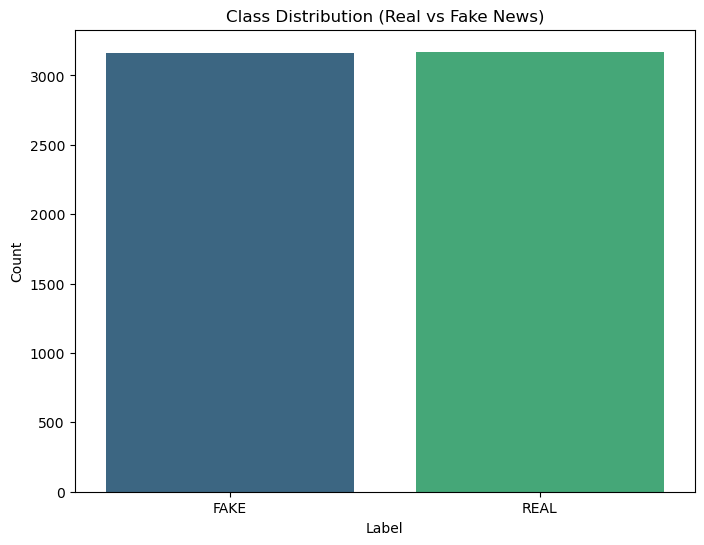

In [7]:

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df, palette='viridis')
plt.title("Class Distribution (Real vs Fake News)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


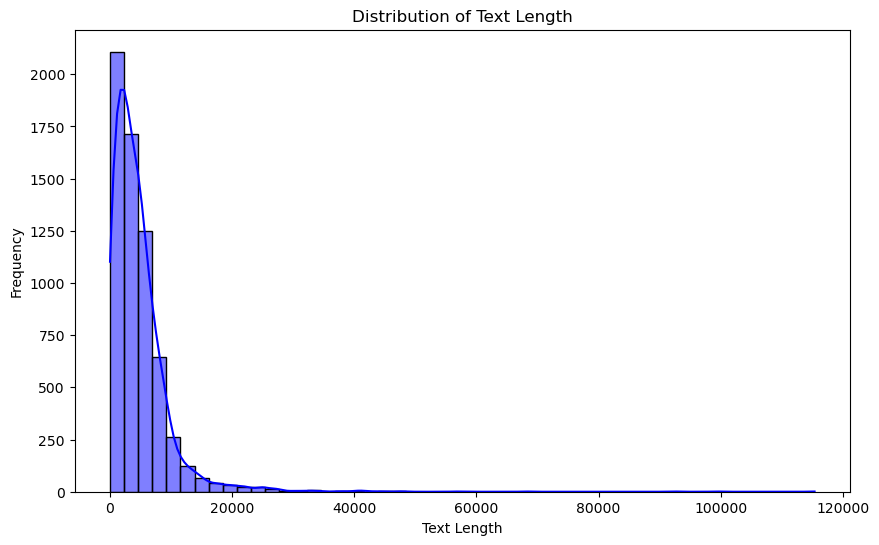

In [8]:

# Analyze text length
df['text_length'] = df['text'].apply(len)

# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11476\1235513638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette='viridis')


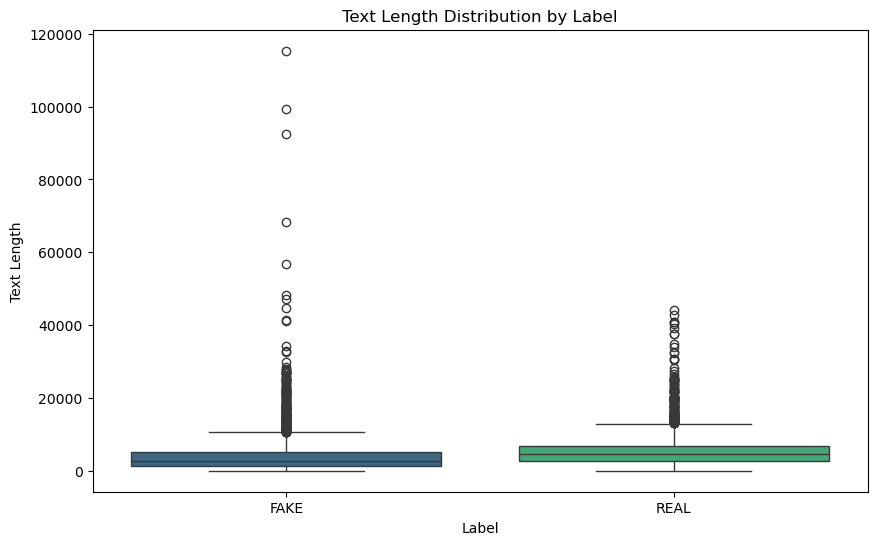

In [9]:

# Compare text length for real vs fake news
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df, palette='viridis')
plt.title("Text Length Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Text Length")
plt.show()


In [10]:

# Generate word clouds for real and fake news
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


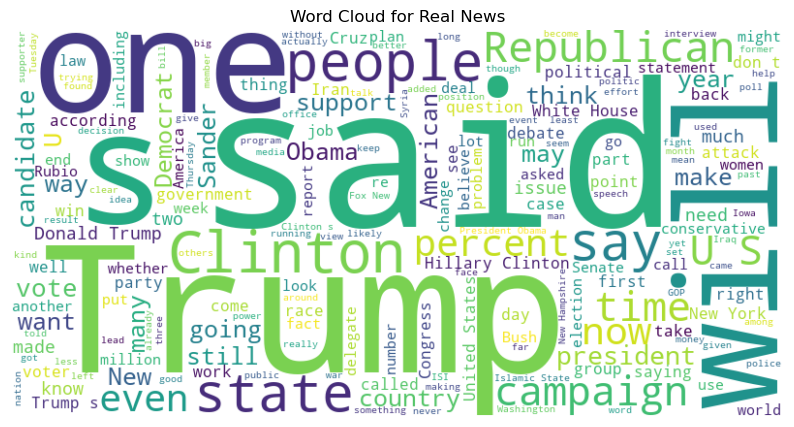

In [11]:

# Word cloud for real news
real_news_text = " ".join(df[df['label'] == 'REAL']['text'])
generate_wordcloud(real_news_text, "Word Cloud for Real News")


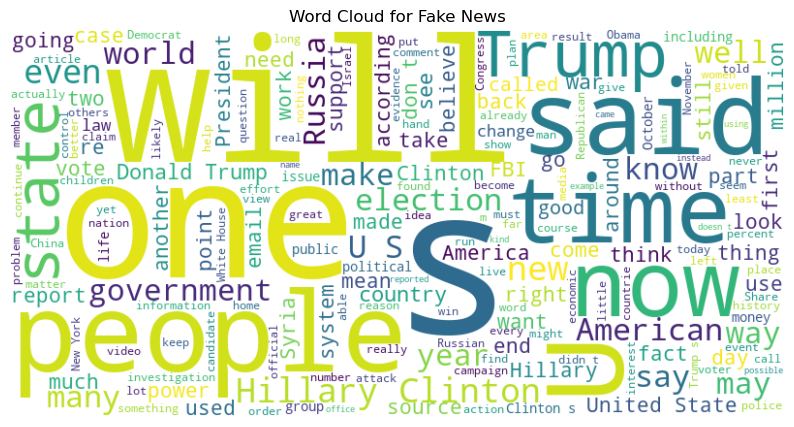

In [12]:

# Word cloud for fake news
fake_news_text = " ".join(df[df['label'] == 'FAKE']['text'])
generate_wordcloud(fake_news_text, "Word Cloud for Fake News")

In [13]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [14]:

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:

# Load the dataset
df = pd.read_csv("fake_or_real_news.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [16]:

# Step 1: Handle Missing Values
# Drop rows with missing text (if any)
df.dropna(subset=['text'], inplace=True)


In [17]:

# Step 2: Remove Punctuation and Special Characters
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df['text'] = df['text'].apply(remove_punctuation)


In [18]:

# Step 3: Convert Text to Lowercase
df['text'] = df['text'].str.lower()


In [19]:

# Step 4: Remove Stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    return " ".join([word for word in words if word not in stop_words])

df['text'] = df['text'].apply(remove_stopwords)


In [20]:

# Step 5: Tokenization (Optional, as we already tokenized for stopwords)
df['tokens'] = df['text'].apply(word_tokenize)


In [21]:

# Step 6: Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(word) for word in tokens])

df['text'] = df['text'].apply(lemmatize_text)


In [23]:

# Display the preprocessed text
print("\nPreprocessed Text:")
print(df[['text']].head())

# Save the preprocessed dataset (optional)
df.to_csv("preprocessed_fake_news_dataset.csv", index=False)


Preprocessed Text:
                                                text
0  daniel greenfield shillman journalism fellow f...
1  google pinterest digg linkedin reddit stumbleu...
2  u secretary state john f kerry said monday sto...
3  kaydee king kaydeeking november 9 2016 lesson ...
4  primary day new york frontrunners hillary clin...


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter


In [25]:

# Load the preprocessed dataset
df = pd.read_csv("preprocessed_fake_news_dataset.csv")


In [26]:

# Separate features (X) and target (y)
X = df['text']  # Text data
y = df['label']  # Labels (REAL or FAKE)


In [27]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:

# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(Counter(y_train))


Class distribution before SMOTE:
Counter({'FAKE': 2536, 'REAL': 2532})


In [29]:

# Step 1: Convert text data into numerical features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)


In [30]:

# Step 2: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Check class distribution after applying SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_train_resampled))

# Save the resampled data (optional)
import numpy as np

# Convert resampled data back to a DataFrame
resampled_df = pd.DataFrame(X_train_resampled.toarray(), columns=tfidf.get_feature_names_out())
resampled_df['label'] = y_train_resampled

# Save to CSV
resampled_df.to_csv("resampled_fake_news_dataset.csv", index=False)


Class distribution after SMOTE:
Counter({'REAL': 2536, 'FAKE': 2536})


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


In [33]:

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

In [34]:

# Define parameter grids for GridSearchCV
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

lr_params = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}



In [35]:

# Create GridSearchCV objects
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='accuracy', n_jobs=-1)

In [36]:

# Train models with grid search
print("Training Random Forest...")
rf_grid.fit(X_train_resampled, y_train_resampled)

print("Training Logistic Regression...")
lr_grid.fit(X_train_resampled, y_train_resampled)


# Print best parameters and scores
models = {'Random Forest': rf_grid, 'Logistic Regression': lr_grid}

for name, model in models.items():
    print(f"\n{name} Results:")
    print(f"Best parameters: {model.best_params_}")
    print(f"Best cross-validation score: {model.best_score_:.4f}")
    
    # Make predictions on test set
    y_pred = model.predict(X_test_tfidf)
    print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Training Random Forest...
Training Logistic Regression...

Random Forest Results:
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9117
Test set accuracy: 0.9155

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.92      0.91      0.91       628
        REAL       0.92      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267


Logistic Regression Results:
Best parameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.9253
Test set accuracy: 0.9305

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       628
        REAL       0.93      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0

In [37]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt


In [38]:

# Get prediction probabilities for ROC curve
rf_probs = rf_grid.predict_proba(X_test_tfidf)[:,1]
lr_probs = lr_grid.predict_proba(X_test_tfidf)[:,1]


In [39]:

# Calculate ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test == 'FAKE', rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test == 'FAKE', lr_probs)


In [40]:

# Calculate AUC
rf_auc = auc(rf_fpr, rf_tpr)
lr_auc = auc(lr_fpr, lr_tpr)


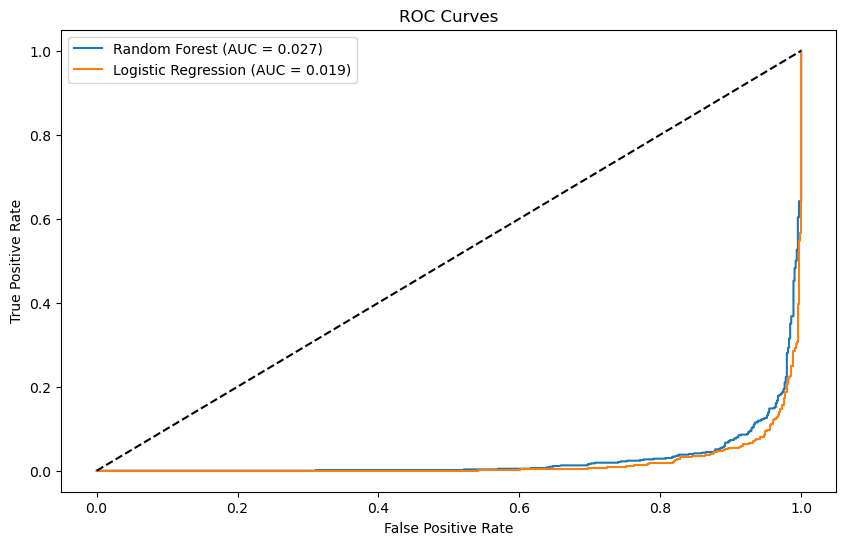

In [41]:

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


In [42]:

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


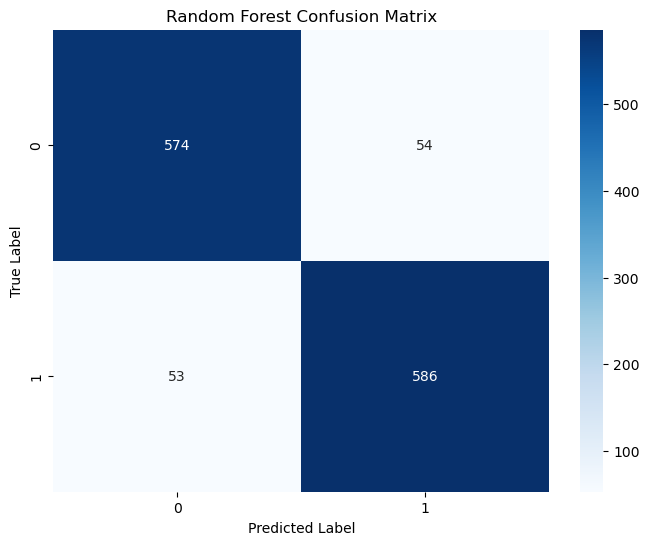

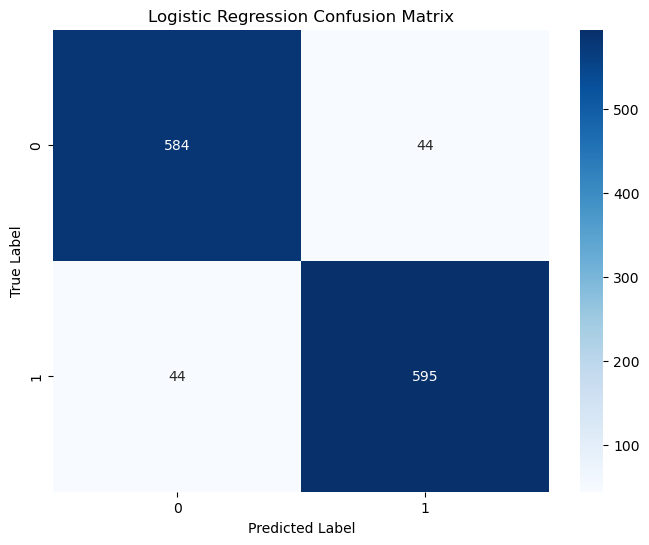

In [43]:

# Plot confusion matrices for both models
plot_confusion_matrix(y_test, rf_grid.predict(X_test_tfidf), 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, lr_grid.predict(X_test_tfidf), 'Logistic Regression Confusion Matrix')


In [44]:

# Error analysis: identify misclassified examples
def analyze_errors(model, X_test, y_test, feature_names):
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)
    
    # Get indices of misclassified samples
    errors = predictions != y_test
    
    # Get the most uncertain predictions (close to 0.5 probability)
    uncertainties = np.abs(probabilities[:, 1] - 0.5)
    most_uncertain = np.argsort(uncertainties)[:10]
    
    print(f"\nTop 10 Most Uncertain Predictions:")
    for idx in most_uncertain:
        print(f"True: {y_test.iloc[idx]}, Predicted: {predictions[idx]}, Probability: {probabilities[idx][1]:.3f}")


In [45]:

# Perform error analysis for both models
print("\nRandom Forest Error Analysis:")
analyze_errors(rf_grid, X_test_tfidf, y_test, tfidf.get_feature_names_out())

print("\nLogistic Regression Error Analysis:")
analyze_errors(lr_grid, X_test_tfidf, y_test, tfidf.get_feature_names_out())


Random Forest Error Analysis:

Top 10 Most Uncertain Predictions:
True: REAL, Predicted: FAKE, Probability: 0.499
True: REAL, Predicted: REAL, Probability: 0.502
True: REAL, Predicted: REAL, Probability: 0.503
True: FAKE, Predicted: REAL, Probability: 0.503
True: REAL, Predicted: FAKE, Probability: 0.497
True: REAL, Predicted: REAL, Probability: 0.504
True: REAL, Predicted: REAL, Probability: 0.505
True: FAKE, Predicted: REAL, Probability: 0.505
True: REAL, Predicted: FAKE, Probability: 0.494
True: FAKE, Predicted: REAL, Probability: 0.507

Logistic Regression Error Analysis:

Top 10 Most Uncertain Predictions:
True: FAKE, Predicted: REAL, Probability: 0.502
True: FAKE, Predicted: REAL, Probability: 0.503
True: REAL, Predicted: REAL, Probability: 0.504
True: FAKE, Predicted: FAKE, Probability: 0.495
True: REAL, Predicted: REAL, Probability: 0.506
True: REAL, Predicted: REAL, Probability: 0.510
True: REAL, Predicted: FAKE, Probability: 0.485
True: REAL, Predicted: FAKE, Probability: 0.

In [46]:
import pickle

# Save the Random Forest model (which typically performs better for text classification)

with open('fake_news_model.pkl', 'wb') as model_file:
    pickle.dump(rf_grid, model_file)